## Visualization of Spatial Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Scalar Fields

Visualizing a scalar field defined by function

$
f(x)=x^2
$

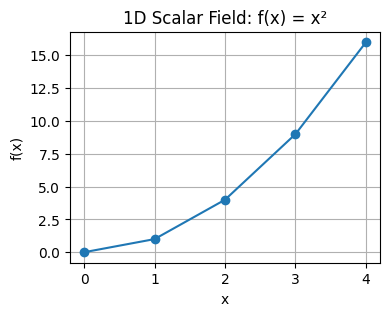

In [ ]:
# 1D domain and field

x = np.array([0, 1, 2, 3, 4])
f = x**2

plt.figure(figsize=(4,3))
plt.plot(x, f, marker='o')
plt.title('1D Scalar Field: f(x) = x²')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

**Analysis:**  
- At \(x=0\), \(f=0\).  
- Values rise quadratically: \(f(1)=1\), \(f(2)=4\), \(f(3)=9\), \(f(4)=16\).  
- The curve’s slope increases with \(x\), illustrating how a scalar field can grow nonlinearly along one dimension.

---

Visualizing 2D Scalar Field defined by fiction

$
f(x, y)=x^2 + y^2
$

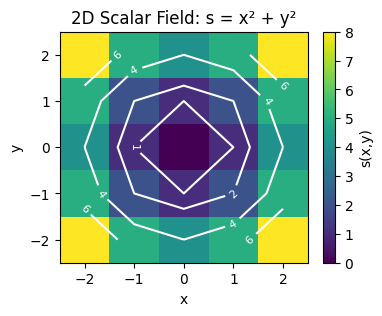

In [10]:
# 2D grid
coords = np.linspace(-2, 2, 5)
X, Y = np.meshgrid(coords, coords)
Z = X**2 + Y**2

plt.figure(figsize=(4,3))
pcm = plt.pcolormesh(X, Y, Z, cmap='viridis', shading='nearest')
plt.colorbar(label='s(x,y)')
cs = plt.contour(X, Y, Z, levels=[1,2,4,6], colors='white')
plt.clabel(cs, inline=True, fontsize=8)
plt.title('2D Scalar Field: s = x² + y²')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


**Analysis:**  
- The minimum value \(Z=0\) occurs at \((0,0)\).  
- Contours at \(f=1,2,4,6\) form concentric circles (in discrete form):  
  - \(f=1\) loops through \((±1,0)\) and \((0,±1)\).  
  - \(f=2\) passes through \((±1,±1)\).  
- Color smoothly increases outward, showing radial symmetry and gradient magnitude growing with distance from the center.

---

Visualizing a scalar field defined by function

$
f(x,y,z)=x^2 + y^2+z^2
$

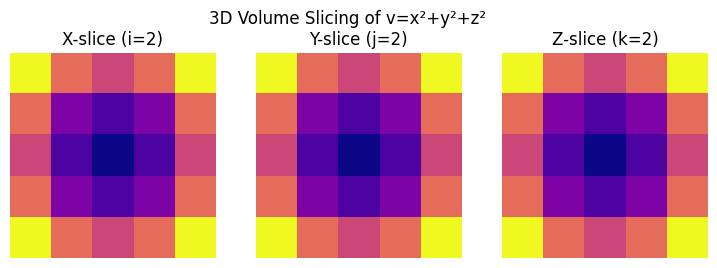

In [13]:
# 3D grid
coords = np.linspace(-2, 2, 5)
X3, Y3, Z3 = np.meshgrid(coords, coords, coords, indexing='ij')
V = X3**2 + Y3**2 + Z3**2

# Slice indices
i = j = k = 2  # center index

fig, axs = plt.subplots(1, 3, figsize=(9,3))
# X-slice at i=2 (vary y,z)
axs[0].imshow(V[i,:,:], origin='lower', extent=[-2,2,-2,2], cmap='plasma')
axs[0].set_title('X-slice (i=2)')
# Y-slice at j=2 (vary x,z)
axs[1].imshow(V[:,j,:], origin='lower', extent=[-2,2,-2,2], cmap='plasma')
axs[1].set_title('Y-slice (j=2)')
# Z-slice at k=2 (vary x,y)
axs[2].imshow(V[:,:,k], origin='lower', extent=[-2,2,-2,2], cmap='plasma')
axs[2].set_title('Z-slice (k=2)')

for ax in axs:
    ax.axis('off')
plt.suptitle('3D Volume Slicing of v=x²+y²+z²')
plt.show()


**Analysis:**  
- All three central slices show concentric circular patterns centered at (0,0) in their respective planes.  
- The smallest value on each slice is 0 at the center of the sphere (\(x=y=z=0\)).  
- Values increase toward the corners of each 2D image: at \((±2,±2)\) the slice value reaches \(2²+2²=8\) (plus the squared coordinate in the third dimension if in X/Y slice).

---

We collapse the 3D field  $ f(x,y,z)=x^2 * y^2+z^2 $ along the Z axis by taking the maximum over Z

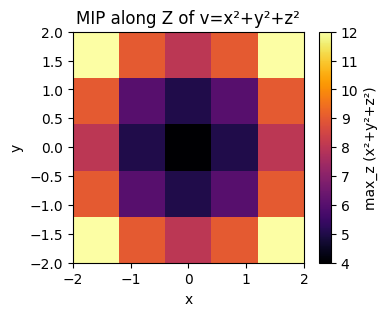

In [7]:
MIP = V.max(axis=2)  # maximum over k (z-axis)

plt.figure(figsize=(4,3))
plt.imshow(MIP, origin='lower', extent=[-2,2,-2,2], cmap='inferno')
plt.colorbar(label='max_z (x²+y²+z²)')
plt.title('MIP along Z of v=x²+y²+z²')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


**Analysis:**  
- At each $(x,y)$, MIP picks the largest $x^2 + y^2 + z^2$ over all $z\in[-2,2]$.  
- Since $z^2$ is maximal at $|z|=2$, $\mathrm{MIP}(x,y) = x^2 + y^2 + 4$.  
- The minimum MIP value is $0 + 0 + 4 = 4$ at the center $(0,0)$, and the maximum is $2^2 + 2^2 + 4 = 12$ at the corners $(\pm2,\pm2)$.  

---

**Isocontours for Topographic (Terrain) Maps**
We create a synthetic terrain elevation field (in meters) over a 0–100 km×0–100 km domain, then draw topographic contour lines at 200 m intervals.

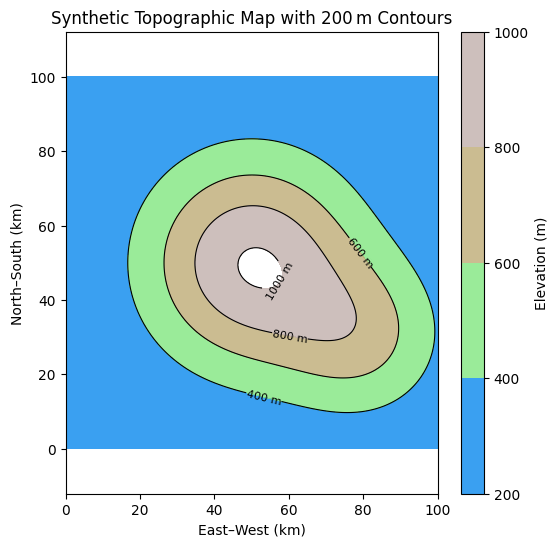

In [ ]:
# 1) Create a regular grid (in kilometers)
nx, ny = 200, 200
x = np.linspace(0, 100, nx)
y = np.linspace(0, 100, ny)
X, Y = np.meshgrid(x, y)

# 2) Define a synthetic “terrain” with two Gaussian hills
Z = (
    200                                        # base elevation
    + 800 * np.exp(-(((X - 50)**2 + (Y - 50)**2) / (2 * 20**2)))   # main hill
    + 400 * np.exp(-(((X - 80)**2 + (Y - 30)**2) / (2 * 15**2)))   # secondary hill
)

# 3) Choose contour levels every 200 m
levels = np.arange(200, Z.max()+1, 200)

# 4) Plot filled contours and isolines
plt.figure(figsize=(6, 6))
cf = plt.contourf(X, Y, Z, levels=levels, cmap='terrain', alpha=0.8)
cs = plt.contour( X, Y, Z, levels=levels, colors='black', linewidths=0.8)
plt.clabel(cs, fmt='%d m', inline=True, fontsize=8)

# 5) Annotate and style
plt.colorbar(cf, label='Elevation (m)')
plt.title('Synthetic Topographic Map with 200 m Contours')
plt.xlabel('East–West (km)')
plt.ylabel('North–South (km)')
plt.axis('equal')
plt.show()


**Analysis:**  
- Base elevation is **200 m** across the plain.  
- The **main hill** centered at (50 km, 50 km) peaks at \(200 + 800 = 1000\) m.  
- The **secondary hill** at (80 km, 30 km) peaks at \(200 + 400 = 600\) m.  
- Contours are drawn at **200 m** intervals: 200 m, 400 m, 600 m, 800 m, 1000 m.  
- **Nested closed loops** indicate higher‐elevation areas: each inner loop corresponds to a higher contour level.  
- **Contour spacing** reveals slope steepness:  
  - **Tight spacing** near hill summits shows **steep** slopes.  
  - **Wide spacing** on hill flanks shows **gentle** slopes.  
- The filled “terrain” colormap highlights elevation variation smoothly, while black isolines give precise level readings—just like a standard topographic map.
